In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import cv2
import os
import matplotlib.pyplot as plt
%matplotlib inline
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [2]:
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Dense, Dropout, Activation,
                                     Flatten)
import tensorflow as tf

In [3]:
data_path = "./mid-term/mid_term/hair_classify/train_800"

x_data_list = []
y_data_list = []
for roots, dirs, files in os.walk(data_path):
    for each in files:
        if each.find('checkpoint') == -1:
            x_data_list.append(os.path.join(roots.split("/")[-1], each))
            y_data_list.append(roots.split("/")[-1])

In [4]:
data_list = pd.DataFrame({})
data_list['img_path'] = x_data_list
data_list['label'] = y_data_list

In [5]:
data_list.head(5)

,img_path,label
0,Blond_Hair_800/0d5544ba7a6d4a03.png,Blond_Hair_800
1,Blond_Hair_800/1b316e4d168b4f0f.png,Blond_Hair_800
2,Blond_Hair_800/0a9bfa756b5842c4.png,Blond_Hair_800
3,Blond_Hair_800/0ec6397c94b24027.png,Blond_Hair_800
4,Blond_Hair_800/1c95f11276354c8c.png,Blond_Hair_800


In [6]:
from sklearn.model_selection import train_test_split

train_list, test_list = train_test_split(data_list,
                                         test_size=0.3,
                                         random_state=91058,
                                         stratify=data_list['label'].values)

In [7]:
img_size = 224
num_class = len(data_list['label'].unique())

In [8]:
data_path_test = "./mid-term/mid_term/hair_classify/testset"

x_data_list_test = []
y_data_list_test = []
for roots, dirs, files in os.walk(data_path_test):
    for each in files:
        if each.find('checkpoint') == -1:
            x_data_list_test.append(os.path.join(roots.split("/")[-1], each))

In [9]:
last_test2=[]
for i in x_data_list_test:
        spl = i.split("/",1)[1]
        last_test2.append(spl)

In [10]:
x_data_filename = []
for i in x_data_list_test:
    spl = i.split(".",1)[0]
    x_data_filename.append(spl)

In [11]:
x_data_filename2 = []
for i in x_data_list_test:
    spl = i.split("/",1)[1]
    x_data_filename2.append(spl)

In [12]:
class_map = pd.read_csv(os.path.join('./mid-term/mid_term/hair_classify/mapping.csv'),
                        header=None, index_col=0)
class_map = class_map.to_dict()[1]

In [13]:
class_map

{'fileName': 'class',
 'bald': '0',
 'black_hair': '1',
 'blond_hair': '2',
 'brown_hair': '3',
 'gray_hair': '4',
 'receding_hairline': '5'}

In [14]:
data_list = pd.DataFrame({})
data_list['img_path'] = x_data_list
data_list['label'] = y_data_list

In [15]:
data_list_test = pd.DataFrame({})
data_list_test['img_path'] = x_data_filename2

In [16]:
class_map['Blond_Hair']='02'
class_map['Brown_Hair']='03'
class_map['Bald']='00'
class_map['Gray_Hair']='04'
class_map['Black_Hair']='01'
class_map['Receding_Hairline']='05'

In [17]:
class_map

{'fileName': 'class',
 'bald': '0',
 'black_hair': '1',
 'blond_hair': '2',
 'brown_hair': '3',
 'gray_hair': '4',
 'receding_hairline': '5',
 'Blond_Hair': '02',
 'Brown_Hair': '03',
 'Bald': '00',
 'Gray_Hair': '04',
 'Black_Hair': '01',
 'Receding_Hairline': '05'}

In [18]:
data_list['label']  = data_list['label'].map(class_map).values.copy()
data_list['label'] = data_list['label'].astype(dtype = 'str')
data_list['label'] 

0       nan
1       nan
2       nan
3       nan
4       nan
       ... 
4795    nan
4796    nan
4797    nan
4798    nan
4799    nan
Name: label, Length: 4800, dtype: object

In [19]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input

In [20]:
vgg_model = VGG16(weights='imagenet', include_top=False,
                  input_shape=(img_size, img_size, 3))

x = Flatten()(vgg_model.output)
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
outputs = Dense(num_class, activation='softmax')(x)


model = Model(inputs=vgg_model.inputs, outputs=outputs)

In [21]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [22]:
vgg_model.trainable = True

In [23]:
#model.summary()

In [24]:
vgg_model.trainable = True

trainable_layer = 3
for layer in vgg_model.layers[:-trainable_layer]:
    layer.trainable = True

for layer in model.layers:
    print(layer, layer.trainable)

# model.summary()

<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7ff6785c89e8> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7ff678671710> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7ff67d88b748> True
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7ff677d9ed68> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7ff677d9edd8> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7ff674767588> True
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7ff674708828> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7ff674708f98> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7ff67471bfd0> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7ff6746c82b0> True
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7ff6746d4550> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7ff6746d4

In [25]:
learning_rate = 0.000017
optimizer = keras.optimizers.Adam(lr=learning_rate)

model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [26]:
batch_size = 32
num_steps = len(train_list) // batch_size + 1
num_epochs = 13

In [27]:
train_datagen = ImageDataGenerator(
                                   width_shift_range=0.3,
                                   height_shift_range=0.1,
                                   #horizontal_flip=True,
                                   preprocessing_function=preprocess_input
                                  )
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [28]:
img_shape = (img_size, img_size)

train_generator = train_datagen.flow_from_dataframe(
                                                    dataframe=train_list,
                                                    directory=data_path,
                                                    x_col="img_path",
                                                    y_col="label",
                                                    target_size=img_shape,
                                                    batch_size=batch_size,
                                                    class_mode='categorical')

valid_generator = test_datagen.flow_from_dataframe(
                                                    dataframe=test_list,
                                                    directory=data_path,
                                                    x_col="img_path",
                                                    y_col="label",
                                                    target_size=img_shape,
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=False)

# 用在不知道 label 的資料讀取上
test_generator = test_datagen.flow_from_dataframe(
                                                     dataframe=data_list_test,
                                                     directory=data_path_test,
                                                     x_col="img_path",
                                                     target_size=img_shape,
                                                     batch_size=batch_size,
                                                     class_mode=None,
                                                     shuffle=False)


Found 3360 validated image filenames belonging to 6 classes.
Found 1440 validated image filenames belonging to 6 classes.
Found 3000 validated image filenames.


In [29]:
model_dir = 'model-logs/vgg16'
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

logfiles = model_dir + '/{}-{}'.format('basic_model',
                                       model.__class__.__name__)
model_cbk = keras.callbacks.TensorBoard(log_dir=logfiles,
                                        histogram_freq=1)

modelfiles = model_dir + '/{}-best-model.h5'.format('basic_model')
model_mckp = keras.callbacks.ModelCheckpoint(modelfiles,
                                             monitor='val_accuracy',
                                             save_best_only=True)

earlystop = keras.callbacks.EarlyStopping(monitor='val_loss',
                                          patience=5,
                                          verbose=1)


callbacks_list = [model_cbk, model_mckp, earlystop]

In [30]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=num_steps,
                              epochs=num_epochs,
                              validation_data=valid_generator,
                              callbacks=callbacks_list)

Epoch 1/13
106/106 [==============================] - 64s 607ms/step - loss: 2.6935 - accuracy: 0.2288 - val_loss: 1.5384 - val_accuracy: 0.3597
Epoch 2/13
106/106 [==============================] - 57s 535ms/step - loss: 1.3627 - accuracy: 0.4522 - val_loss: 0.9783 - val_accuracy: 0.6299
Epoch 3/13
106/106 [==============================] - 58s 548ms/step - loss: 0.9759 - accuracy: 0.6327 - val_loss: 0.8567 - val_accuracy: 0.6826
Epoch 4/13
106/106 [==============================] - 59s 553ms/step - loss: 0.7776 - accuracy: 0.7061 - val_loss: 0.6130 - val_accuracy: 0.7736
Epoch 5/13
106/106 [==============================] - 57s 538ms/step - loss: 0.6314 - accuracy: 0.7706 - val_loss: 0.6334 - val_accuracy: 0.7757
Epoch 6/13
106/106 [==============================] - 58s 546ms/step - loss: 0.5467 - accuracy: 0.8022 - val_loss: 0.5561 - val_accuracy: 0.8035
Epoch 7/13
106/106 [==============================] - 58s 548ms/step - loss: 0.4711 - accuracy: 0.8261 - val_loss: 0.5289 - val_ac

## 訓練結果視覺化

In [31]:
loss, acc = model.evaluate_generator(valid_generator, verbose=2)

45/45 - 8s - loss: 0.6324 - accuracy: 0.8333


In [32]:
y_pred = model.predict_generator(valid_generator)
y_pred = y_pred.argmax(-1)

In [33]:
y_test = valid_generator.classes
class_name = valid_generator.class_indices
class_names = np.array([each for each in class_name.keys()])

In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.8333333333333334
[[230   0   0   0   2   8]
 [  2 193   0  25   3  17]
 [  0   1 220   6   8   5]
 [  0   6  25 193   6  10]
 [  5   2   7   5 205  16]
 [  8  24  14  14  21 159]]


Text(0.5, 1, 'Confusion Matrix')

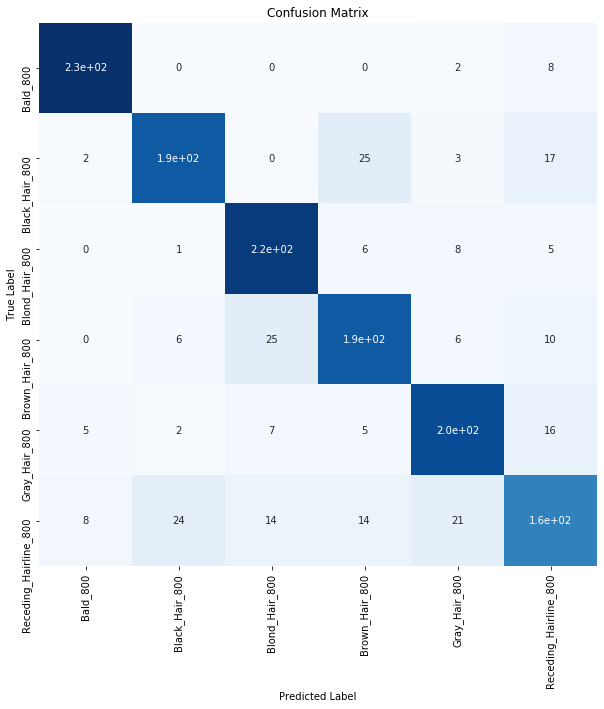

In [35]:
import seaborn as sns

matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 10))
sns.heatmap(matrix, annot=True, cbar=False, cmap="Blues",
            xticklabels=class_names,
            yticklabels=class_names)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')

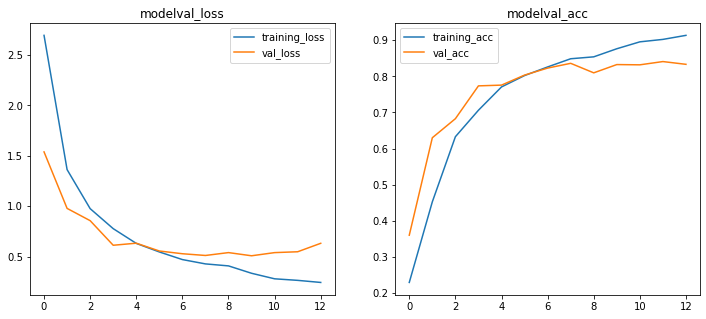

In [36]:
train_history = ['loss', 'val_loss', 'accuracy', 'val_accuracy']
name_history = ['training_loss', 'val_loss', 'training_acc', 'val_acc']

plt.figure(figsize=(12, 5))
for eachx, eachy, i in zip(train_history, name_history, range(4)):
    if i % 2 == 0:
        plt.subplot(1, 2, i//2+1)
    l_x = len(history.history[eachx])
    plt.plot(np.arange(l_x), history.history[eachx], label=eachy)
    plt.legend(loc='best')
    plt.title('model'+eachy)
plt.show()

In [37]:
test_generator.reset()

In [38]:
test_pred = model.predict_generator(test_generator)

In [39]:
test_pred = test_pred.argmax(-1)

In [40]:
filenames = test_generator.filenames

In [41]:
result = pd.DataFrame({'fileName':last_test2,'class': test_pred})

In [42]:
result.to_csv('hair_091058.csv',index=False)